## AAG00

### Analisando o DataSet

Segundo o artigo consultado foram coletadas medidas de distância de 1 a 20 metros a cada metro usando o FTM (Fine Time Measurement) especificado na IEEE 802.11. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../DataSet/outdoor40.csv")
df.head()

,actualDist,rttRaw,estDistRaw,absErrRaw,rttEst,estDistEst,absErrEst,varRtt,meanRtt,countRtt,meanRss,distEst
0,1,5,0.749481,0.250519,0,0.0,1.0,2.839286,5.375,8,-66.0,0.0
1,1,5,0.749481,0.250519,0,0.0,1.0,2.785714,5.750,8,-66.0,0.0
2,1,5,0.749481,0.250519,0,0.0,1.0,0.982143,5.125,8,-66.0,0.0
3,1,4,0.599585,0.400415,0,0.0,1.0,1.000000,5.000,7,-66.0,0.0
4,1,4,0.599585,0.400415,0,0.0,1.0,2.696429,5.125,8,-66.0,0.0


In [3]:
df.describe()

,actualDist,rttRaw,estDistRaw,absErrRaw,rttEst,estDistEst,absErrEst,varRtt,meanRtt,countRtt,meanRss,distEst
count,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000
mean,10.372730,78.619943,11.784833,1.456713,60.804715,9.114397,1.351726,79.635487,79.127334,7.684294,-80.112394,9.188069
std,5.728561,41.412703,6.207608,0.856879,37.910268,5.682606,0.662475,154.891540,41.425581,0.718537,6.587537,5.683101
min,1.000000,3.000000,0.449689,0.002075,0.000000,0.000000,0.012453,0.000000,3.857143,1.000000,-90.333333,0.000000
25%,5.000000,43.000000,6.445538,0.848028,28.000000,4.197094,0.963179,7.125000,43.375000,8.000000,-85.375000,4.290000
50%,10.000000,79.000000,11.841802,1.385887,59.000000,8.843878,1.205396,22.982143,79.428571,8.000000,-81.500000,8.970000
75%,15.000000,114.000000,17.088170,1.940349,90.000000,13.490661,1.653009,84.261905,114.375000,8.000000,-77.750000,13.520000
max,20.000000,162.000000,24.283189,6.539934,136.000000,20.385887,5.451764,2651.500000,163.000000,8.000000,-57.000000,20.400000


#### Descrição dos Campos

- **actualDist**: Distância real
- **rttRaw**: Tempo de viagem bruto (RTT)
- **estDistRaw**: Distância estimada usando o tempo bruto (RTT)
- **rttEst**: Tempo estimado pelo ESP32
- **estDistEst**: Distância estimada pelo ESP32
- **meanRss**: Média do valor de RSS (intensidade do sinal)

 #### Gráfico correlacionando distância real e intensidade do sinal

 Usado para avaliar a correlação entre as medidas

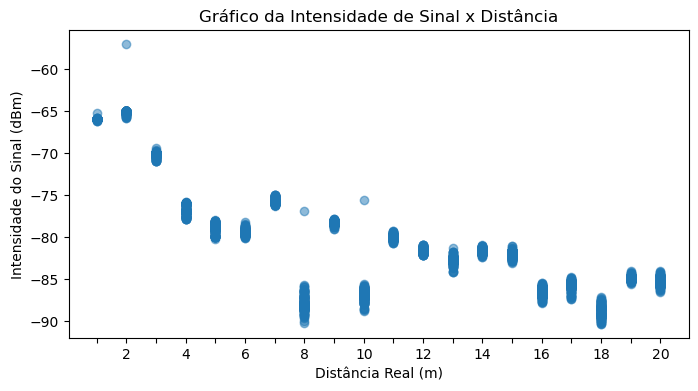

In [4]:
import matplotlib.pyplot as plt

max_dist = df['actualDist'].max()
min_dist = df['actualDist'].min()

plt.figure(figsize=(8, 4))
plt.scatter(df['actualDist'], df['meanRss'], alpha=0.5)
plt.xlabel('Distância Real (m)')
plt.ylabel('Intensidade do Sinal (dBm)')
plt.title('Gráfico da Intensidade de Sinal x Distância')

# Ajustar a escala do eixo x para ticks de 1 em 1 e rótulos de 2 em 2
ticks = range(int(min_dist), int(max_dist) + 1)
labels = [str(i) if i % 2 == 0 else '' for i in ticks]
plt.xticks(ticks, labels)

plt.show()

Fazendo o calculo da correlação entre as variáveis

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$$

In [5]:
df['actualDist'].corr(df['meanRss'])

-0.7998984140898491

Podemos notar que há correlação inversa entre elas.

 #### Gráfico das Distâncias Estimadas

 Usado para avaliar a precisão e acurácia das medidas estimadas pelos dois métodos.

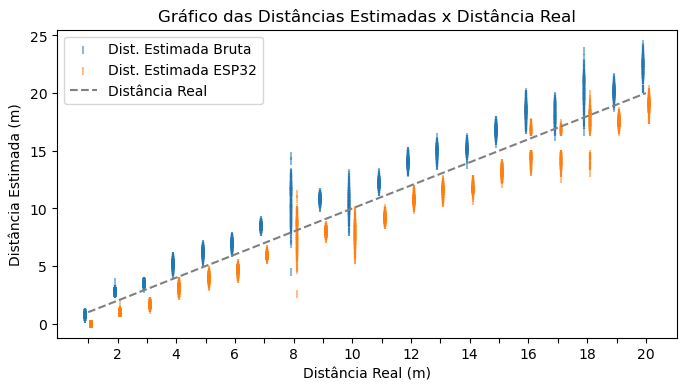

In [6]:
# Criar o gráfico de pontos

plt.figure(figsize=(8, 4))
plt.scatter(df['actualDist'] - 0.1, df['estDistRaw'], label='Dist. Estimada Bruta', 
    alpha=0.5, marker='|')
plt.scatter(df['actualDist'] + 0.1, df['estDistEst'], label='Dist. Estimada ESP32', 
    alpha=0.5, marker='|')

# Linha representando a distância real
max_dist = df['actualDist'].max()
min_dist = df['actualDist'].min()
plt.plot([min_dist, max_dist], [min_dist, max_dist], linestyle='--', color='gray', \
    label='Distância Real')

# Adicionar título e rótulos aos eixos
plt.title('Gráfico das Distâncias Estimadas x Distância Real')
plt.xlabel('Distância Real (m)')
plt.ylabel('Distância Estimada (m)')
plt.legend()

# Ajustar a escala do eixo x para ticks de 1 em 1 e rótulos de 2 em 2
ticks = range(int(min_dist), int(max_dist) + 1)
labels = [str(i) if i % 2 == 0 else '' for i in ticks]
plt.xticks(ticks, labels)

# Mostrar o gráfico
plt.show()

**OBS: Fiz um pequeno deslocamento dos dados para esquerda e direita da distância para facilitar a visão das duas opções de coleta.** Esta visualização me permitiu identificar um padrão na leitura dos dados e avaliar a possibilidade de criar um novo método para melhorar a acurácia do FTM.

Podemos notar um offset nas duas estimativas, curiosamente uma deu sempre uma medida um pouco maior e a outra um pouco menor que a real

Agora vamos verificar se existem outras correlações.

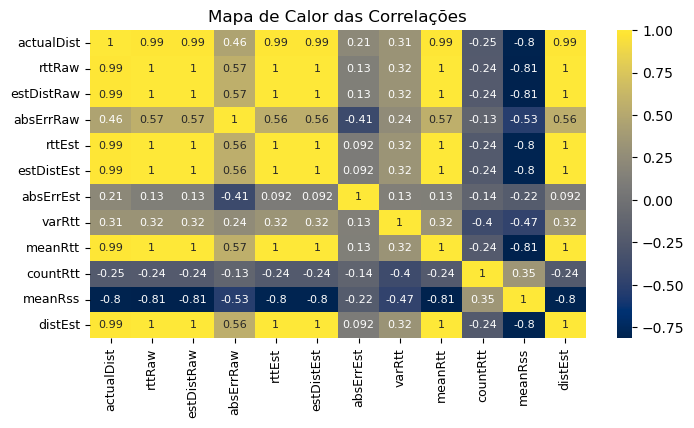

In [7]:
# mapa de calor da matriz de correlação dos dados numéricos
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap='cividis', annot_kws={"size": 8})
plt.title("Mapa de Calor das Correlações")
plt.xticks(fontsize=9) 
plt.yticks(fontsize=9) 
plt.show()

Como esperado, ha correlação total entre o RTT e a distância estimada pois esta é calculada a partir do RTT.

Podemos observar que existe correlação muito forte entre as estimativas de distância e a distância real.

Exite correlação inversa mais fraca entre o RSS e a distância Real.